In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
%matplotlib inline

In [31]:
url = 'http://apmonitor.com/pds/uploads/Main/manufacturing.txt'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        70 non-null     float64
 1   wall_thickness      70 non-null     float64
 2   infill_density      70 non-null     int64  
 3   infill_pattern      70 non-null     object 
 4   nozzle_temperature  70 non-null     int64  
 5   bed_temperature     70 non-null     int64  
 6   print_speed         70 non-null     int64  
 7   material            70 non-null     object 
 8   fan_speed           70 non-null     int64  
 9   roughness           70 non-null     int64  
 10  tension_strength    70 non-null     int64  
 11  elongation          70 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.7+ KB


In [32]:
import sdv
from sdv.metadata import Metadata

from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer

from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

In [33]:
metadata = Metadata.detect_from_dataframe(data=df, table_name='df')

In [37]:
def data_synthesis(model):
    
    
    
    synthesizer = model(metadata)
    synthesizer.fit(df)
    synthetic_data = synthesizer.sample(num_rows=100)
    
    diagnostic = run_diagnostic(df, synthetic_data, metadata) # 1. perform basic validity checks
    
    quality_report = evaluate_quality(df, synthetic_data, metadata) # 2. measure the statistical similarity
           
    return quality_report

In [40]:
for i in [GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer]:
    
    np.random.seed(24)
    torch.manual_seed(24)
    
    print(f'Evalaution of synthetic data for the model {i.__name__} is:')
    synthesizer_report = data_synthesis(i)
    print('\n')

Evalaution of synthetic data for the model GaussianCopulaSynthesizer is:
Generating report ...

(1/2) Evaluating Data Validity: |███████████████████████████████████████████████████| 12/12 [00:00<00:00, 1827.98it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |████████████████████████████████████████████████████| 12/12 [00:00<00:00, 921.12it/s]|
Column Shapes Score: 83.1%

(2/2) Evaluating Column Pair Trends: |███████████████████████████████████████████████| 66/66 [00:00<00:00, 250.41it/s]|
Column Pair Trends Score: 79.22%

Overall Score (Average): 81.16%



Evalaution of synthetic data for the model CTGANSynthesizer is:
Generating report ...

(1/2) Evaluating Data Validity: |███████████████████████████████████████████████████| 12/12 [00:00<00:00, 1327.63it/s]|
Data 

In [44]:
np.random.seed(24)
torch.manual_seed(24)
    
synthesizerGCS = GaussianCopulaSynthesizer(metadata)
synthesizerGCS.fit(df)
synthetic_dataB = synthesizerGCS.sample(num_rows=100)
    
quality_report = evaluate_quality(df, synthetic_dataB, metadata)
    


Generating report ...

(1/2) Evaluating Column Shapes: |███████████████████████████████████████████████████| 12/12 [00:00<00:00, 5999.00it/s]|
Column Shapes Score: 83.1%

(2/2) Evaluating Column Pair Trends: |███████████████████████████████████████████████| 66/66 [00:00<00:00, 248.94it/s]|
Column Pair Trends Score: 79.22%

Overall Score (Average): 81.16%



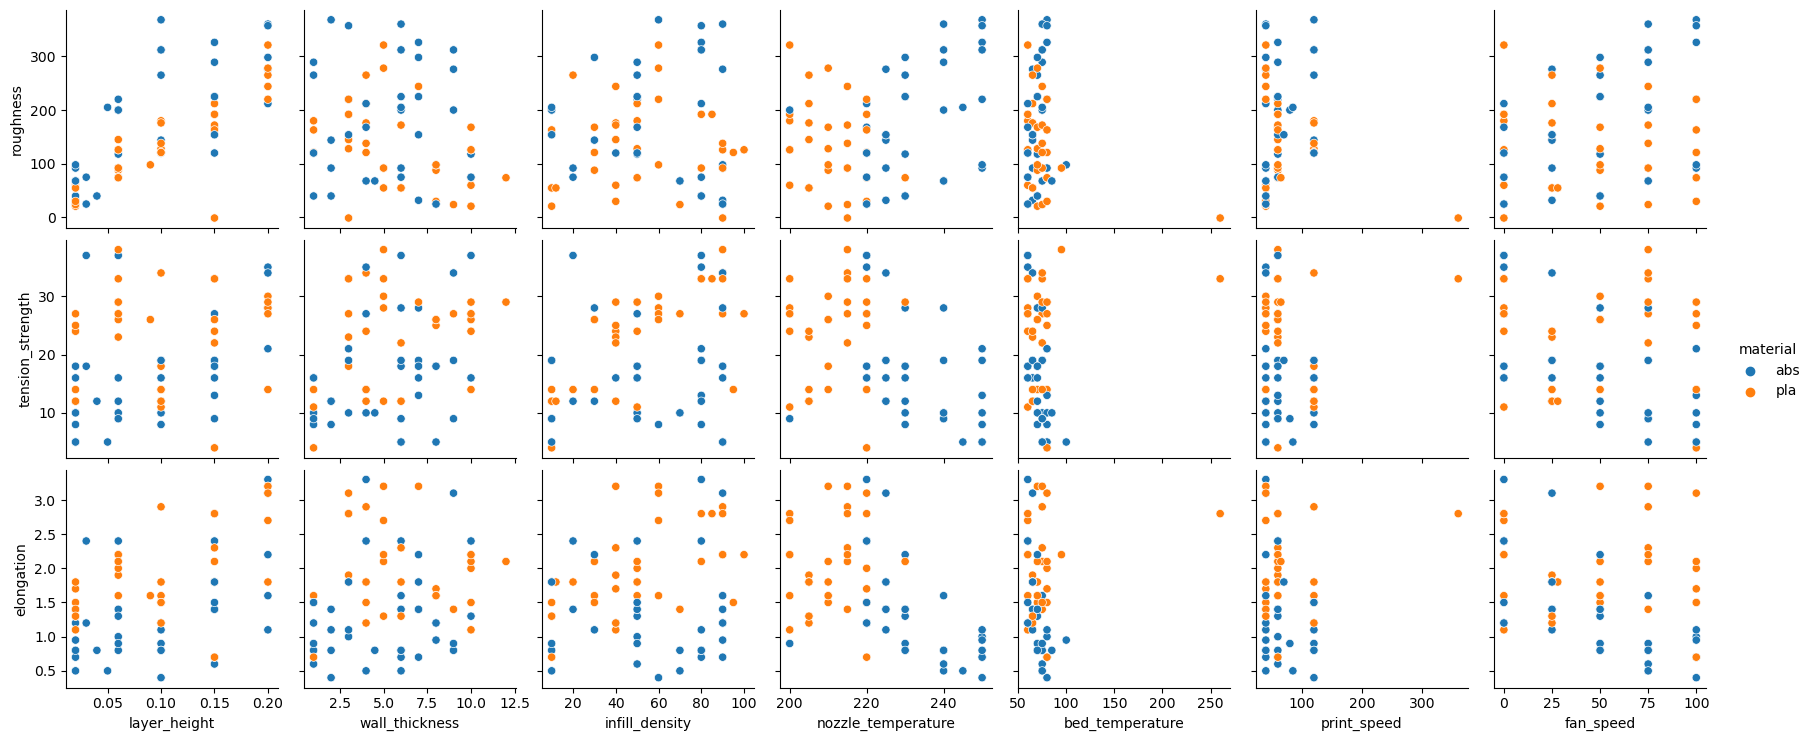

In [57]:
sns.pairplot(df,
             x_vars = ['layer_height', 
                        'wall_thickness', 
                        'infill_density', 
                        'nozzle_temperature', 
                        'bed_temperature',
                        'print_speed', 
                        'fan_speed'],
            y_vars = ['roughness', 
                      'tension_strength', 
                      'elongation'],
            hue='material')

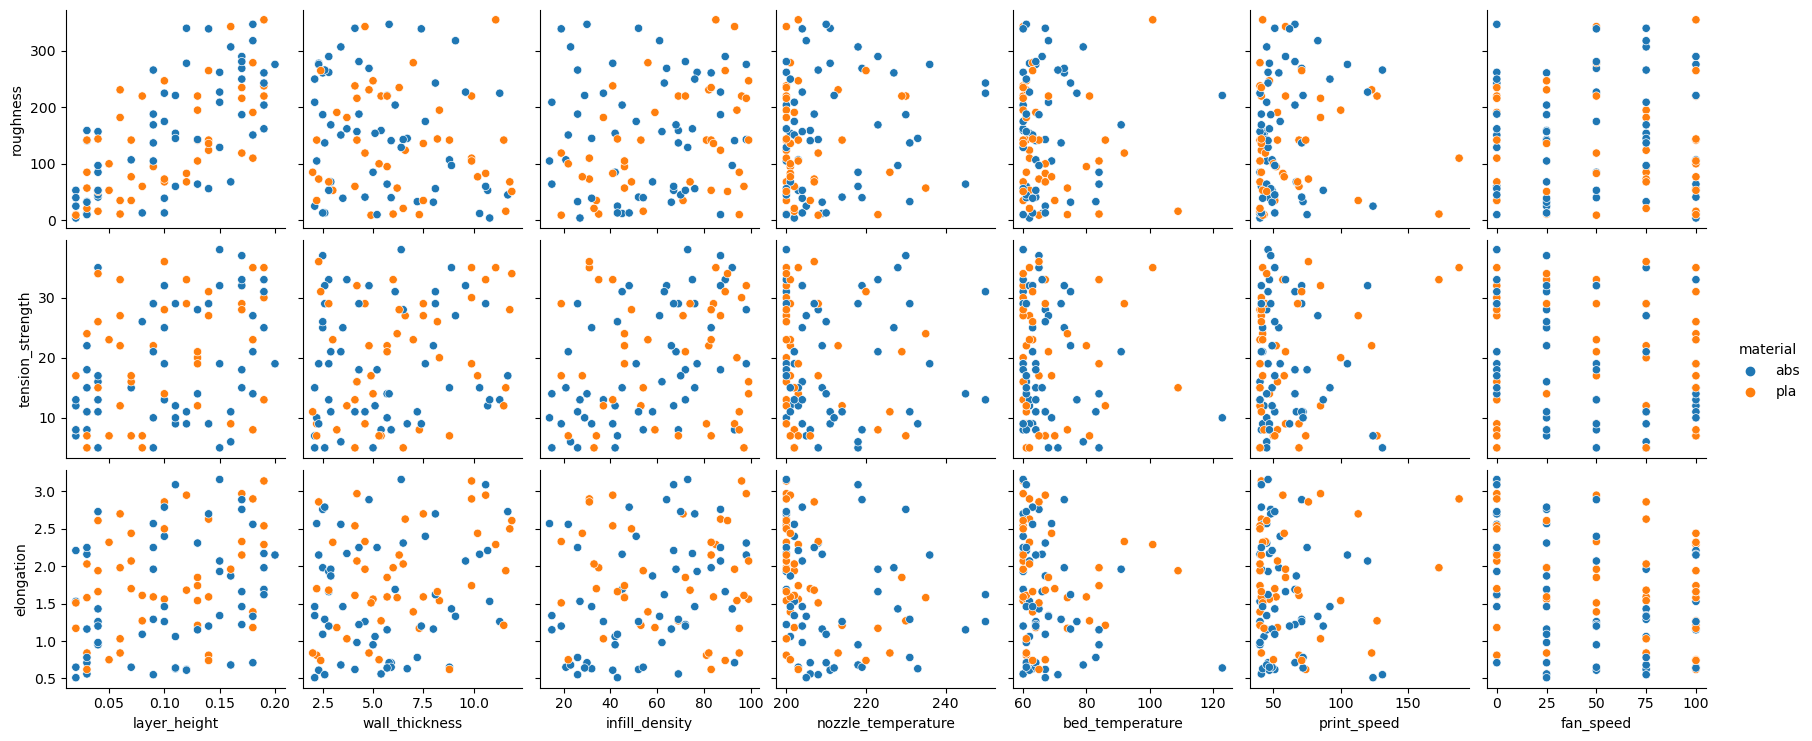

In [63]:
sns.pairplot(synthetic_dataB,
             x_vars = ['layer_height', 
                        'wall_thickness', 
                        'infill_density', 
                        'nozzle_temperature', 
                        'bed_temperature',
                        'print_speed', 
                        'fan_speed'],
            y_vars = ['roughness', 
                      'tension_strength', 
                      'elongation'],
            hue='material')

layer_height             AxesSubplot(0.125,0.53;0.133621x0.35)
wall_thickness        AxesSubplot(0.285345,0.53;0.133621x0.35)
infill_density         AxesSubplot(0.44569,0.53;0.133621x0.35)
nozzle_temperature    AxesSubplot(0.606034,0.53;0.133621x0.35)
bed_temperature       AxesSubplot(0.766379,0.53;0.133621x0.35)
print_speed              AxesSubplot(0.125,0.11;0.133621x0.35)
fan_speed             AxesSubplot(0.285345,0.11;0.133621x0.35)
roughness              AxesSubplot(0.44569,0.11;0.133621x0.35)
tension_strength      AxesSubplot(0.606034,0.11;0.133621x0.35)
elongation            AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

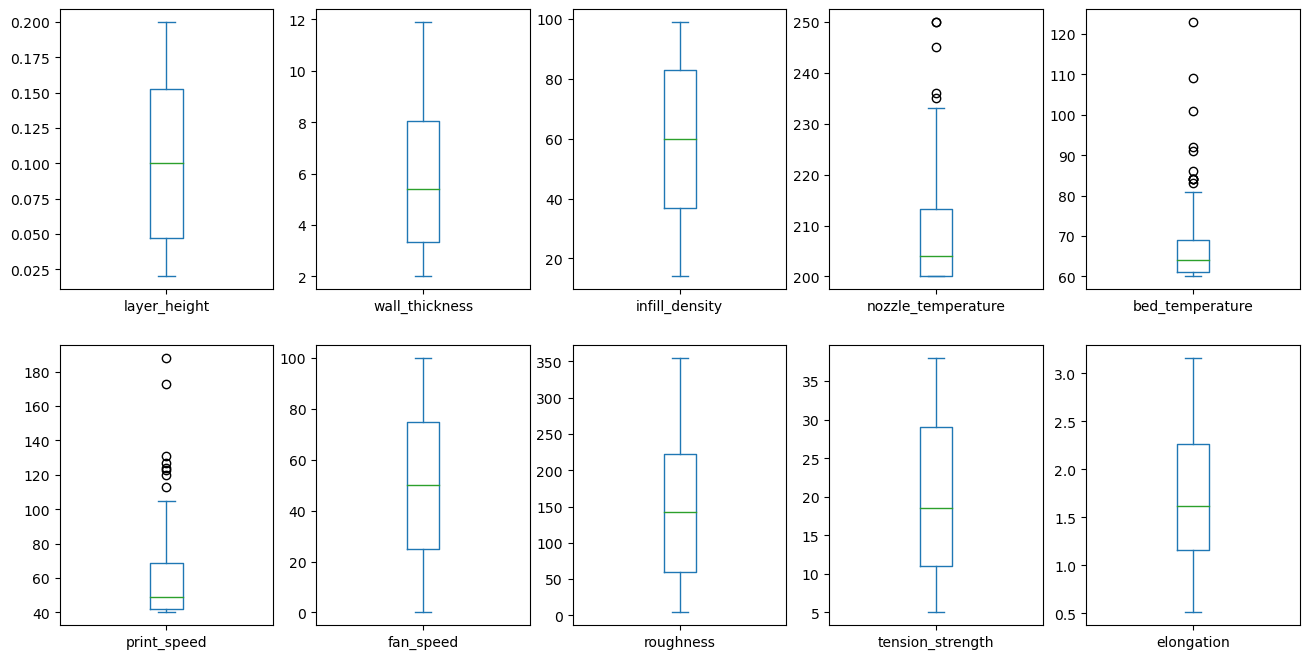

In [64]:
synthetic_dataB.plot(kind='box', subplots = True, layout = (2,5), figsize=(16,8))

layer_height             AxesSubplot(0.125,0.53;0.133621x0.35)
wall_thickness        AxesSubplot(0.285345,0.53;0.133621x0.35)
infill_density         AxesSubplot(0.44569,0.53;0.133621x0.35)
nozzle_temperature    AxesSubplot(0.606034,0.53;0.133621x0.35)
bed_temperature       AxesSubplot(0.766379,0.53;0.133621x0.35)
print_speed              AxesSubplot(0.125,0.11;0.133621x0.35)
fan_speed             AxesSubplot(0.285345,0.11;0.133621x0.35)
roughness              AxesSubplot(0.44569,0.11;0.133621x0.35)
tension_strength      AxesSubplot(0.606034,0.11;0.133621x0.35)
elongation            AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

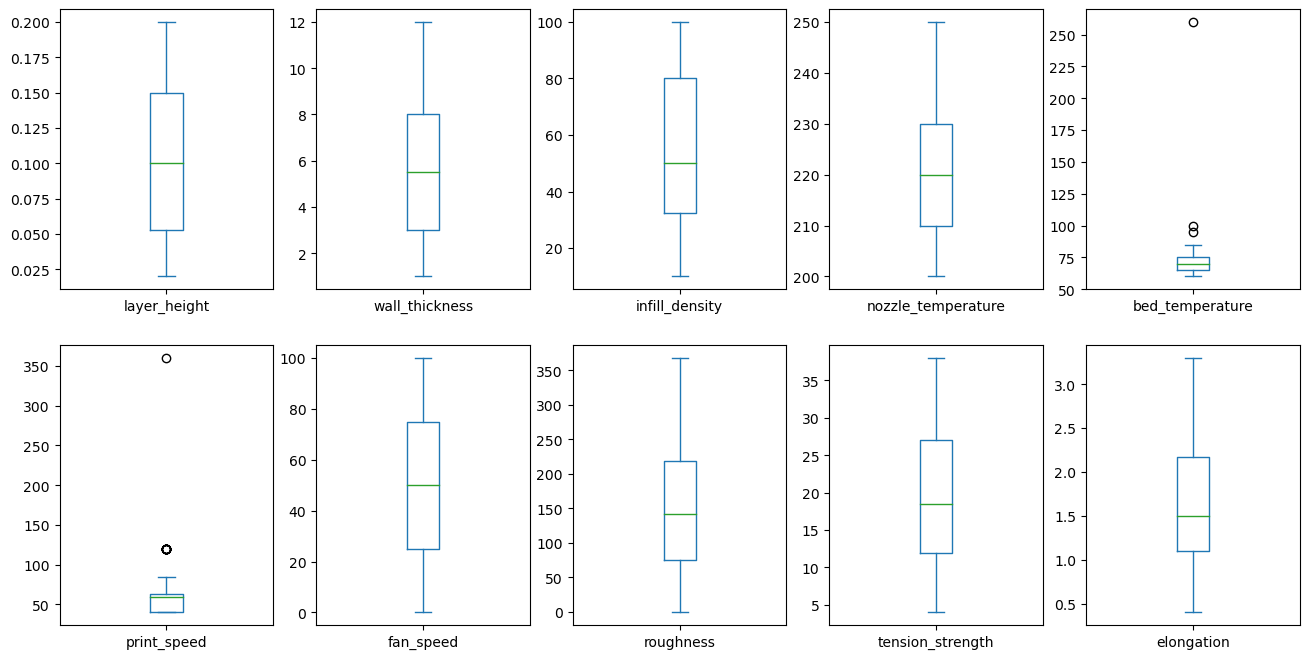

In [65]:
df.plot(kind='box', subplots = True, layout = (2,5), figsize=(16,8))

<AxesSubplot:ylabel='count'>

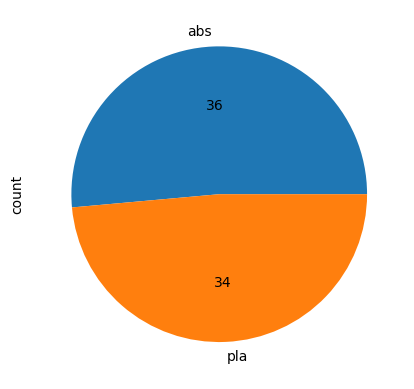

In [66]:
df['material'].value_counts().plot(kind='pie', autopct=lambda p: f'{p * df.material.value_counts().sum() / 100:.0f}')

<AxesSubplot:xlabel='material'>

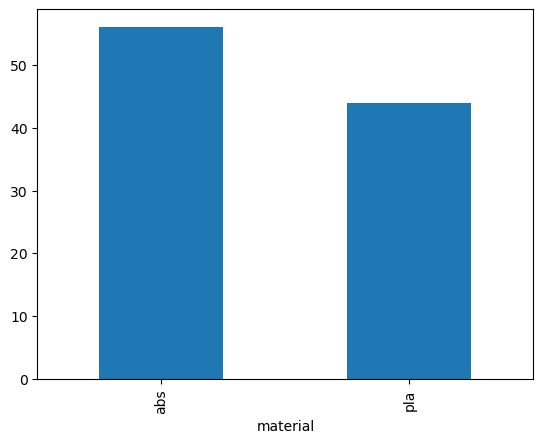

In [74]:
synthetic_dataB['material'].value_counts().plot(kind='bar')

In [71]:
synthetic_dataB.material.value_counts()

material
abs    56
pla    44
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

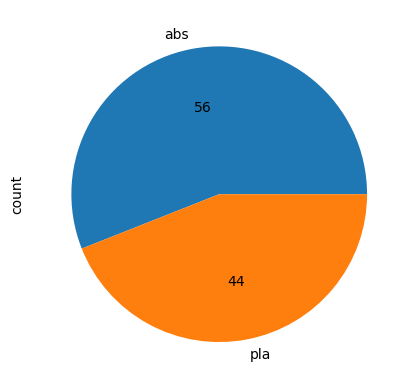

In [76]:
synthetic_dataB['material'].value_counts().plot(kind='pie', autopct=lambda p: f'{p * synthetic_dataB.material.value_counts().sum() / 100:.0f}')

<AxesSubplot:ylabel='count'>

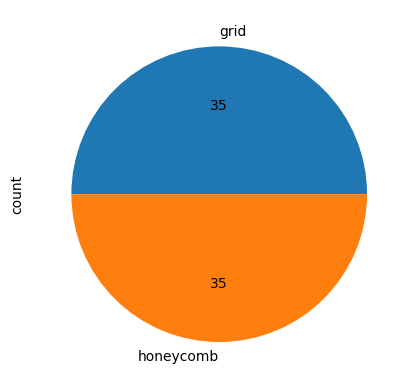

In [77]:
df['infill_pattern'].value_counts().plot(kind='pie', autopct=lambda p: f'{p * df.infill_pattern.value_counts().sum() / 100:.0f}')

<AxesSubplot:ylabel='count'>

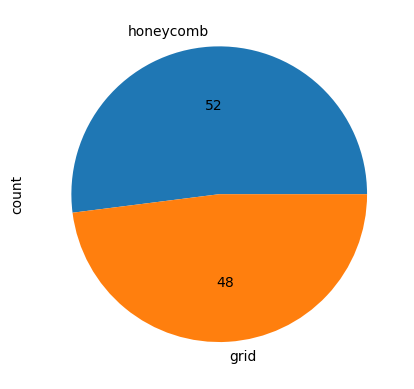

In [78]:
synthetic_dataB['infill_pattern'].value_counts().plot(kind='pie', autopct=lambda p: f'{p * synthetic_dataB.infill_pattern.value_counts().sum() / 100:.0f}')

In [84]:
df = pd.concat([df, synthetic_dataB], axis=0, ignore_index=True)

In [90]:
df.drop_duplicates(inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 169
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        170 non-null    float64
 1   wall_thickness      170 non-null    float64
 2   infill_density      170 non-null    int64  
 3   infill_pattern      170 non-null    object 
 4   nozzle_temperature  170 non-null    int64  
 5   bed_temperature     170 non-null    int64  
 6   print_speed         170 non-null    int64  
 7   material            170 non-null    object 
 8   fan_speed           170 non-null    int64  
 9   roughness           170 non-null    int64  
 10  tension_strength    170 non-null    int64  
 11  elongation          170 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 17.3+ KB


<AxesSubplot:ylabel='count'>

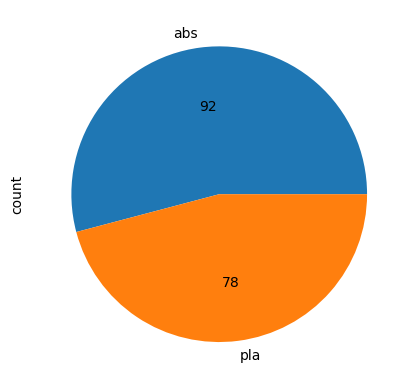

In [92]:
df['material'].value_counts().plot(kind='pie', autopct=lambda p: f'{p * df.material.value_counts().sum() / 100:.0f}')

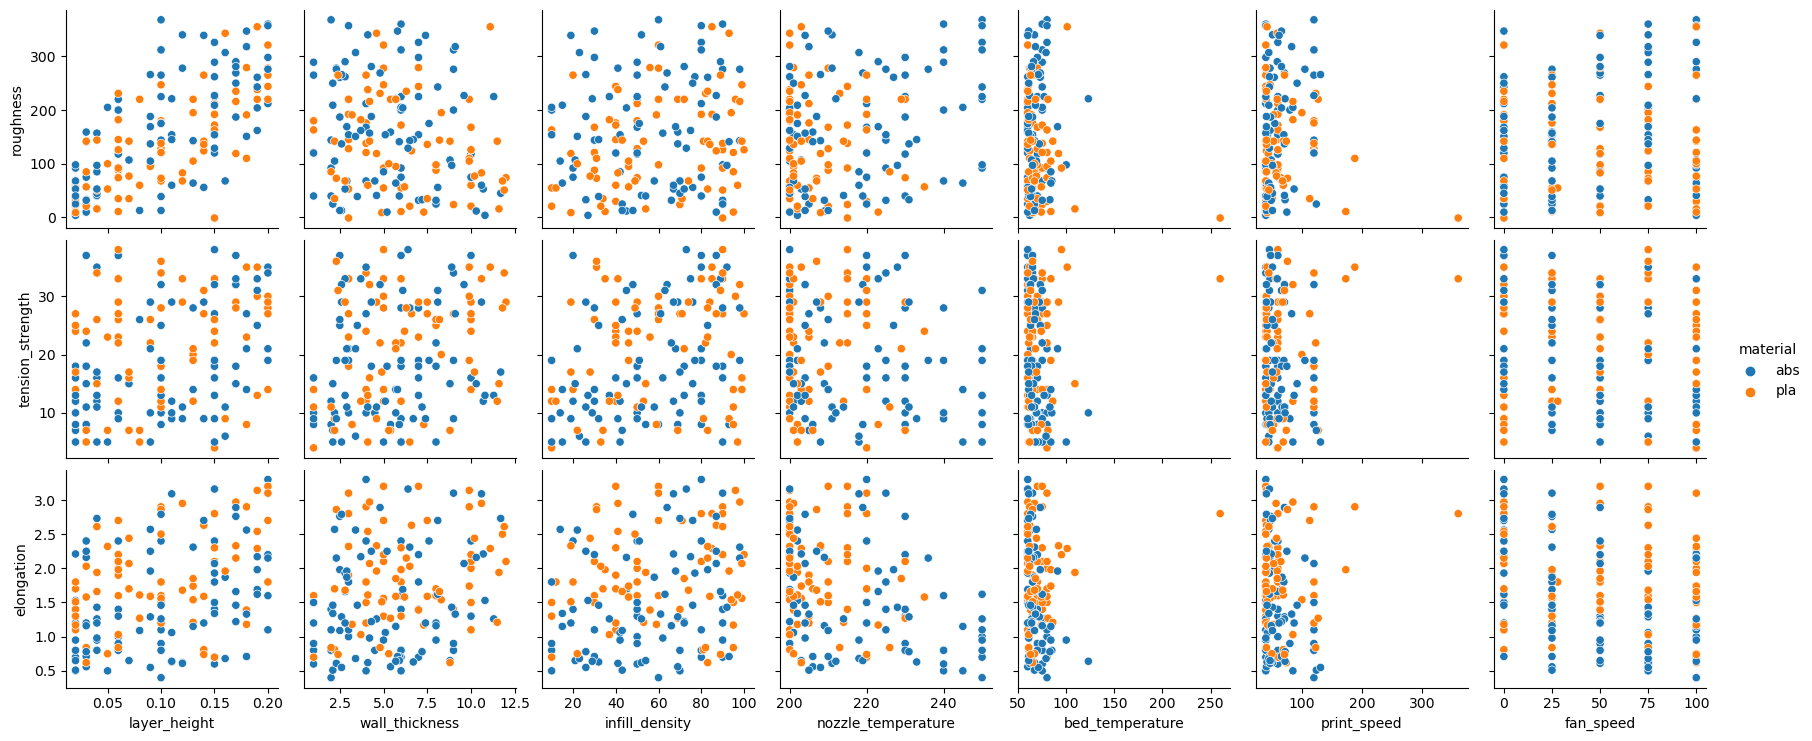

In [93]:
sns.pairplot(df,
             x_vars = ['layer_height', 
                        'wall_thickness', 
                        'infill_density', 
                        'nozzle_temperature', 
                        'bed_temperature',
                        'print_speed', 
                        'fan_speed'],
            y_vars = ['roughness', 
                      'tension_strength', 
                      'elongation'],
            hue='material')

layer_height             AxesSubplot(0.125,0.53;0.133621x0.35)
wall_thickness        AxesSubplot(0.285345,0.53;0.133621x0.35)
infill_density         AxesSubplot(0.44569,0.53;0.133621x0.35)
nozzle_temperature    AxesSubplot(0.606034,0.53;0.133621x0.35)
bed_temperature       AxesSubplot(0.766379,0.53;0.133621x0.35)
print_speed              AxesSubplot(0.125,0.11;0.133621x0.35)
fan_speed             AxesSubplot(0.285345,0.11;0.133621x0.35)
roughness              AxesSubplot(0.44569,0.11;0.133621x0.35)
tension_strength      AxesSubplot(0.606034,0.11;0.133621x0.35)
elongation            AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

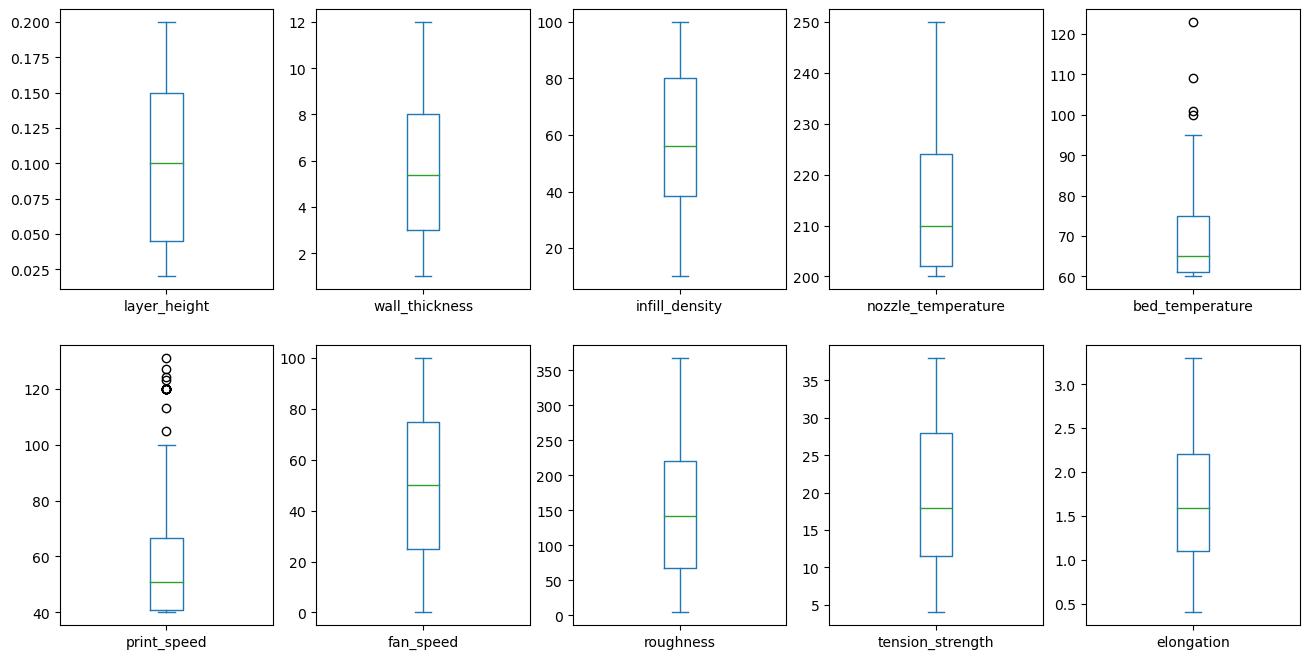

In [97]:
df.plot(kind='box', subplots = True, layout = (2,5), figsize=(16,8))

In [98]:
def outlierdetection(feature):
    q3 = df[feature].quantile(0.75)
    
    return df[feature] > q3+1.5*q3

for i, j in df.select_dtypes(exclude='object').items():
    outliers = outlierdetection(i)
    print(df[outliers][i])
    print('\n')


Series([], Name: layer_height, dtype: float64)


Series([], Name: wall_thickness, dtype: float64)


Series([], Name: infill_density, dtype: int64)


Series([], Name: nozzle_temperature, dtype: int64)


Series([], Name: bed_temperature, dtype: int64)


Series([], Name: print_speed, dtype: int64)


Series([], Name: fan_speed, dtype: int64)


Series([], Name: roughness, dtype: int64)


Series([], Name: tension_strength, dtype: int64)


Series([], Name: elongation, dtype: float64)




In [96]:
df = df.drop(index=[63, 80, 103]).reset_index()
df = df.drop('index', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        167 non-null    float64
 1   wall_thickness      167 non-null    float64
 2   infill_density      167 non-null    int64  
 3   infill_pattern      167 non-null    object 
 4   nozzle_temperature  167 non-null    int64  
 5   bed_temperature     167 non-null    int64  
 6   print_speed         167 non-null    int64  
 7   material            167 non-null    object 
 8   fan_speed           167 non-null    int64  
 9   roughness           167 non-null    int64  
 10  tension_strength    167 non-null    int64  
 11  elongation          167 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 15.8+ KB


In [99]:
df.to_csv('additive_manufacturing_synthetic.csv', index=False)